### 타다 금지법 동영상 댓글 분석
#### KoNLPy를 사용

### 공식 사이트
#### https://konlpy-ko.readthedocs.io/ko/v0.5.2/

- ubuntu 기준 설치

    `sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl`
    
    `python3 -m pip install konlpy`
    
    
- 윈도우 기준 설치

    `pip install --upgrade pip`

    `pip install JPype1-0.5.7-cp27-none-win_amd64.whl`

    `pip install konlpy`
    
    
    
- 분석 방법
    - MongoDB 에서 데이터 가져오기
    - df 변환하고 샘플 뽑기
    - df 파일 텍스트 파일로 변환
    - 단어, 단어 빈도수, 형태소 추출
    - 중복 : 라인(문장별), 단어별 확인
    - 중복 단어, 특정 제거 기준에 따라 단어 처리
    - 최종 빈도수 파악
    - 워드 크라우드, 그래프 시각화


In [1]:
#package import
from konlpy.tag import * # konlpy 한글 분석용
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 폰트...ㅠ

from collections import Counter # 빈도 분석
import pandas as pd

import pymongo


okt = Okt()
kkma = Kkma()

In [4]:
# 몽고DB에서 데이터 가져오기
client = pymongo.MongoClient("mongodb://:@...:27017/")
result = client.crawling.youtube
comment_result = pd.DataFrame(result.find({}))
comment_result.tail()

,_id,comment,like_num,title,youtube_id
1279,5e6f9a43899b7f0e360b8f25,타다 유권자 보단 택시 유권자가 많으니.. 표를 얻으려면 어쩔수 없지...,1개,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,김수면TV
1280,5e6f9a43899b7f0e360b8f26,불법 타다 옹호하는 애들아! \n택시가 그렇게 불편하고 서비스가 엉망이면 서비스가 ...,3개,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,김건이
1281,5e6f9a43899b7f0e360b8f27,타다 패. 카카오 회사 승.\n타다 금지법 통과 됐다고 해서 택시가 이기는게 아님....,1개,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,김건이
1282,5e6f9a43899b7f0e360b8f28,꽁으로 먹으려다 결국 이렇게 되었넹...,0개,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,subinoh
1283,5e6f9a43899b7f0e360b8f29,사납금에 대해선 찍소리도 못하는 무식한 택시기사들.,1개,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,민주국가대한민국


In [50]:
a = comment_result['like_num']
b=[]
for i in range(0, len(a)):
    c = a[i].replace("개","")
    b.append(c)

len(b)

1284

In [58]:
    
comment_result['like_co'] = b
comment_result['like_co'] = comment_result['like_co'].astype(int)
liek_co_up = comment_result.like_co >=1
comment_result_sort = comment_result.loc[liek_co_up, :]
comment_result_sort = comment_result_sort.sort_values(by='like_co', ascending=False)
comment_result_sort.head()
comment_sort = list(comment_result_sort['comment'])

In [38]:
comment_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 6 columns):
_id           1284 non-null object
comment       1284 non-null object
like_num      1284 non-null object
title         1284 non-null object
youtube_id    1284 non-null object
like_co       1284 non-null int64
dtypes: int64(1), object(5)
memory usage: 60.3+ KB


In [3]:
# 잘려서 보이지만 다 보임.
import sys
comment = list(comment_result['comment'])
# 양이 많아 10개만
comment_sample = comment[0:471]
comment_sample

['멍청한인간!대통령 등에업고 별 회괴한 짓거리를 다하는구나.노블리스오블리제!넌 도덕심도 양심도 없는 한낫 돈많은 괴물이야~',
 '법앞에는 만인이 평등한걸 알아아지...권력기생충들...',
 '혁신 ㅡ 지금도 택시회사나\n개인택시 ㅡ줄도산 위기 ㅡ\n타다 ㅡ 머여 ㅡ 자가용영업까지 한다고 ? ㅡ\n같이 죽자고  ?',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '당연한거다 어디서 말장난으로 사가지없이',
 '이재용 대표님에게 한 말씀 하겠습니다 그렇게 운수업을 하고 싶으면 지금 당장택시 회사나 개인택시면허을 사 가지고 그렇게정상적으로 운영을 하세요 왜 돈 한푼 안 들이고 그렇게 공짜로 하려고 그러니까 반발이 심한거 아닙니까~\n이재용대표님에목적은다른대있는거다압니다',
 '수천 수만대 택시가 대기\n중 인대\n계속 대기 하고 있을까\n타다 당신도 번호판 4차\n5차 하면',
 "택시 서비스개선 수칙!\n나는 내 택시를 이용하는 승객에게 내가 이용한다는 생각으로 반대의 입장에서 운행한다!!\n\n1.내 영업구역 외 가급적 합법 승차거부도 줄인다\n2.내 택시는 항상 청결을 유지한다\n3.익숙하진 않지만 '안녕하세요','감사합니다 '\n   최대한 웃는 얼굴로 승객을 대한다\n4.승객의 짐은 내가 싣고 내려 드린다\n5.인사말 외 최대한 말을 줄인다\n6.카드 계산도 반갑게 받아 들인다\n7.내 택시가 운행할 수 있는 도로는 무조건\n   모신다\n8.절대 운행 중 전화는 사양한다\n9.과속및 난폭운전 NO 준법운행 한다\n10.용모단정!\n11.절대 영업구역 내 승차거부는 없다\n12.젊은 승객에게 반말하지 않기\n\n등등 수칙으로 정할 사항이 더 있을 듯 합니다\n택시 서비스개선만이 답임을 동참 해 나가시죠\n동료 선,후배님들 이제부터 시작입니다!\n우리 업권보호를 위한 모습!!파이팅입니다",
 '택시 평점제 도입 국민청원. 아래 링크',
 '불법스타트업은안생겨도이세상아주잘돌아가.그런걱정은안해도돼.세계평화나잘연구해봐',
 'it하나 접목시킨거 빼고는 택시랑 다를게 없는데 워

In [4]:
#NLP 분석 시 텍스트 형태로 불러와 작업해줘야 한다.
#파일 쓰는 함수
def write_txt(list,fname,sep):
    file = open(fname,'w')
    vstr = ''
    
    for a in list:
        vstr = vstr + str(a) + sep
    vstr = vstr.rstrip(sep)
    
    file.writelines(vstr)
    
    file.close()
    print('[complete]')

In [5]:
write_txt(comment_sample,'wtest_samlpe.txt',sep="'")

[complete]


In [6]:
com_txt = open('wtest_samlpe.txt').read()

In [7]:
# 추출된 단어 구하기
word_ext = okt.nouns(com_txt)
print(word_ext)

['인간', '대통령', '등', '별', '회', '괴한', '짓거리', '노블', '리스', '블', '리제', '넌', '도덕', '양심', '낫', '돈', '괴물', '법앞', '만인', '걸', '권력', '기생충', '혁신', '지금', '택시', '회사', '개인', '택시', '줄', '도산', '위기', '머', '자가용', '영업', '말장난', '이재용', '대표', '말씀', '운수업', '지금', '당장', '택시', '회사', '개인', '택시', '사', '가지', '정상', '운영', '왜', '돈', '푼', '안', '공짜', '반발', '이재용', '대표', '목적', '압니', '수천', '만대', '택시', '대기', '중', '인대', '계속', '대기', '당신', '번호판', '차', '차', '택시', '서비스', '개선', '수칙', '나', '내', '택시', '이용', '승객', '내', '이용', '생각', '반대', '입장', '운행', '내', '영업', '구역', '외', '합법', '승차', '거부', '내', '택시', '항상', '청결', '유지', '최대한', '얼굴', '승객', '대한', '승객', '짐', '내', '인사말', '외', '최대한', '말', '카드', '계산', '내', '택시', '운행', '수', '도로', '무조건', '절대', '운행', '중', '전화', '사양', '과속', '및', '난폭운전', '준법', '운행', '용모', '단정', '절대', '영업', '구역', '내', '승차', '거부', '승객', '반말', '등등', '수칙', '정', '사항', '더', '듯', '택시', '서비스', '개선', '답임', '동참', '해', '나가시', '동료', '선', '후배', '이제', '시작', '우리', '업', '보호', '위', '모습', '파이팅', '택시', '평점', '제', '도입', '국민', '청원', '아래', '링크', '불법', '

In [8]:
# 추출 단어 빈도수 구하기
word_freq = Counter(word_ext)
print(word_freq)
# 결과를 보니 생각보다 별로다... 전체 결과를 보았을 때는 타다 언급이 가장 많았음.

Counter({'택시': 239, '불법': 59, '영업': 55, '법': 55, '기사': 52, '사업': 46, '혁신': 43, '정부': 40, '것': 38, '다가': 35, '차': 34, '생각': 33, '국민': 33, '돈': 30, '서비스': 30, '면허': 29, '이재웅': 28, '말': 27, '산업': 27, '나라': 25, '왜': 24, '표': 24, '이': 24, '사람': 21, '합법': 19, '국회': 18, '판사': 18, '회사': 17, '금': 17, '금지': 17, '더': 16, '렌터카': 16, '한국': 16, '때': 16, '국회의원': 16, '문제': 16, '거': 16, '기업': 16, '개인': 15, '내': 15, '콜': 15, '사기꾼': 15, '업체': 15, '이해': 15, '안': 14, '좀': 14, '운수': 14, '임': 14, '기존': 14, '소리': 14, '앱': 14, '지금': 13, '차량': 13, '뭐': 13, '금지법': 13, '사서': 13, '거부': 12, '시작': 12, '아주': 12, '대한민국': 12, '경쟁': 12, '카니발': 12, '저': 11, '개': 11, '신천지': 11, '사이비': 11, '운전': 11, '데': 11, '때문': 11, '카카오': 11, '방송': 11, '무슨': 11, '호출': 11, '대통령': 10, '대표': 10, '도로': 10, '이제': 10, '위': 10, '하나': 10, '명': 10, '일자리': 10, '자': 10, '그': 10, '방식': 10, '앞': 10, '우버': 10, '국토부': 10, '모두': 10, '이용': 9, '해': 9, '진짜': 9, '그냥': 9, '자동차': 9, '협박': 9, '이상': 9, '자격증': 9, '상생': 9, '놈': 9, '니': 9, '정권': 9, '번호판': 8, '입장'

In [9]:
# 명사, 조사 각 품사들 찾아내기
print(okt.pos(com_txt, join=True))

['멍청한/Adjective', '인간/Noun', '!/Punctuation', '대통령/Noun', '등/Noun', '에/Josa', '업고/Verb', '별/Noun', '회/Noun', '괴한/Noun', '짓거리/Noun', '를/Josa', '다/Adverb', '하는구나/Verb', './Punctuation', '노블/Noun', '리스/Noun', '오/Modifier', '블/Noun', '리제/Noun', '!/Punctuation', '넌/Noun', '도덕/Noun', '심도/Verb', '양심/Noun', '도/Josa', '없는/Adjective', '한/Determiner', '낫/Noun', '돈/Noun', '많은/Adjective', '괴물/Noun', '이야/Josa', "~'/Punctuation", '법앞/Noun', '에는/Josa', '만인/Noun', '이/Josa', '평등한/Adjective', '걸/Noun', '알아아지/Verb', '.../Punctuation', '권력/Noun', '기생충/Noun', '들/Suffix', "...'/Punctuation", '혁신/Noun', 'ㅡ/KoreanParticle', '지금/Noun', '도/Josa', '택시/Noun', '회사/Noun', '나/Josa', '\n/Foreign', '개인/Noun', '택시/Noun', 'ㅡ/KoreanParticle', '줄/Noun', '도산/Noun', '위기/Noun', 'ㅡ/KoreanParticle', '\n/Foreign', '타다/Verb', 'ㅡ/KoreanParticle', '머/Noun', '여/Josa', 'ㅡ/KoreanParticle', '자가용/Noun', '영업/Noun', '까지/Josa', '한다고/Verb', '?/Punctuation', 'ㅡ/KoreanParticle', '\n/Foreign', '같이/Adverb', '죽자고/Verb', "?'/Punctuation", 'ㅋㅋㅋㅋㅋㅋ

In [10]:
# 형태소 추출 하기. norm 은 문장 정규화 stem 은 어간 추출
print(okt.morphs(com_txt, norm=True))

['멍청한', '인간', '!', '대통령', '등', '에', '업고', '별', '회', '괴한', '짓거리', '를', '다', '하는구나', '.', '노블', '리스', '오', '블', '리제', '!', '넌', '도덕', '심도', '양심', '도', '없는', '한', '낫', '돈', '많은', '괴물', '이야', "~'", '법앞', '에는', '만인', '이', '평등한', '걸', '알아아지', '...', '권력', '기생충', '들', "...'", '혁신', 'ㅡ', '지금', '도', '택시', '회사', '나', '\n', '개인', '택시', 'ㅡ', '줄', '도산', '위기', 'ㅡ', '\n', '타다', 'ㅡ', '머', '여', 'ㅡ', '자가용', '영업', '까지', '한다고', '?', 'ㅡ', '\n', '같이', '죽자고', "?'", 'ㅋㅋㅋ', "'", '당연한거다', '어디서', '말장난', '으로', '사가지', '없이', "'", '이재용', '대표', '님', '에게', '한', '말씀', '하겠습니다', '그렇게', '운수업', '을', '하고', '싶으면', '지금', '당장', '택시', '회사', '나', '개인', '택시', '면', '허을', '사', '가지', '고', '그렇게', '정상', '적', '으로', '운영', '을', '하세요', '왜', '돈', '한', '푼', '안', '들이고', '그렇게', '공짜', '로', '하려고', '그러니까', '반발', '이', '심한거', '아닙니까', '~', '\n', '이재용', '대표', '님', '에', '목적', '은', '다른대', '있는거다', '압니', '다', "'", '수천', '수', '만대', '택시', '가', '대기', '\n', '중', '인대', '\n', '계속', '대기', '하고', '있을까', '\n', '타다', '당신', '도', '번호판', '4', '차', '\n', '5', '차', '하면

In [11]:
# 어절 추출
print(okt.phrases(com_txt))

['멍청한인간', '대통령', '대통령 등', '별 회괴한', '별 회괴한 짓거리', '노블리스오블리제', '넌 도덕', '양심', '없는 한낫', '없는 한낫 돈', '없는 한낫 돈많은 괴물', '법앞', '만인', '평등한걸', '권력기생충들', '혁신', '지금', '택시회사', '개인택시', '줄도산', '줄도산 위기', '자가용영업', '말장난', '이재용', '이재용 대표님', '말씀', '운수업', '지금 당장택시', '지금 당장택시 회사', '사 가지', '운영', '왜 돈 한푼', '왜 돈 한푼 안', '공짜', '반발', '이재용대표님', '목적', '압니', '수천', '수천 수만대', '수천 수만대 택시', '대기', '중 인대', '계속', '계속 대기', '당신', '번호판', '번호판 4차', '5차', '택시', '택시 서비스개선', '택시 서비스개선 수칙', '내 택시', '이용', '이용하는 승객', '이용한다는', '이용한다는 생각', '반대', '반대의 입장', '운행', '내 영업구역', '내 영업구역 외', '합법', '합법 승차거부', '항상', '항상 청결', '유지', '최대한', '최대한 웃는 얼굴', '승객', '대한', '승객의 짐', '인사말', '인사말 외', '인사말 외 최대한', '인사말 외 최대한 말', '카드', '카드 계산', '운행할 수', '운행할 수 있는 도로', '무조건', '절대', '절대 운행', '절대 운행 중', '절대 운행 중 전화', '사양', '과속및', '과속및 난폭운전', '과속및 난폭운전 NO', '과속및 난폭운전 NO 준법운행', '10', '용모단정', '11', '절대 영업구역', '절대 영업구역 내', '절대 영업구역 내 승차거부', '12', '젊은 승객', '반말', '등등', '등등 수칙', '정할 사항', '더 있을 듯', '답임', '동참', '동참 해', '동참 해 나가시', '동료', '동료 선', '후배님', '후배님들 이제', '시작', '우리', '

In [12]:
# 만약 각 줄별로 동일한 단어가 나올 경우 제거 하고 싶을 때
# 라인별로 읽어야 하기 때문에  open -> readline을 쓴다.
com_txt = open('wtest_samlpe.txt').readlines()
duplicate_comment = []
for i in com_txt:
    duplicate_comment1 = kkma.nouns(i)
    for j in range(0,len(duplicate_comment1)):
        duplicate_comment.append(duplicate_comment1[j])
print(duplicate_comment)    

['인간', '대통령', '등에', '등에업고', '업고', '별', '회', '회괴한', '괴한', '짓거리', '노', '리스', '리스오', '오', '리', '넌', '도덕심', '양심', '한', '한낫', '낫', '돈', '괴물', '법', '법앞', '앞', '만인', '평등', '아지', '권력', '권력기생충', '기생충', '혁신', 'ㅡ', '지금', '택시', '택시회사', '회사', '개인', '개인택시', '택시', 'ㅡ', 'ㅡ줄', '줄', '산', '위기', 'ㅡ', '여', '자가용', '자가용영업', '영업', '거', '어디', '말장난', '사', '사가지', '가지', '이재', '대표', '말씀', '운', '운수업', '수업', '당장', '당장택시', '택시', '회사', '개인', '개인택시면허', '면허', '사', '정상적', '운영', '하세', '돈', '푼', '안', '공짜', '반발', '이재', '목적', '대', '대표', '거', '수천', '수만', '수만대', '택시', '대기', '중', '인대', '계속', '대기', '당신', '번호판', '4', '4차', '차', '5', '5차', '차', '하면', '택시', '서비스', '서비스개선', '개선', '수칙', '내', '택시', '이용', '승객', '내가', '생각', '반대', '입장', '운행', '1', '내', '영업', '영업구역', '구역', '외', '합법', '승차', '승차거부', '거부', '2', '택시', '청결', '유지', '3', '안녕', '안녕하세', '하세', '감사', '얼굴', '승객', '4', '승객', '짐', '내가', '5', '인사말', '외', '최대', '말', '6', '카드', '계산', '7', '택시', '운행', '수', '도로', '8', '절대', '운행', '중', '전화', '사양', '9', '과속', '난폭', '난폭운전', '운전', '준법', '준법운행',

In [13]:
# 문장별 중복 단어를 제거하고 빈도수 확인
duplicate_comment_freq = Counter(duplicate_comment)
print(duplicate_comment_freq)

Counter({'택시': 112, '불법': 42, '거': 39, '기사': 36, '차': 32, '법': 30, '혁신': 29, '말': 28, '영업': 26, '나라': 26, '4': 25, '생각': 25, '표': 25, '돈': 24, '대': 24, '서비스': 24, '산업': 22, '면허': 21, '수': 21, '국민': 21, '사업': 21, '정부': 21, '이재': 20, '웅': 20, '사람': 20, '데': 20, '안': 19, '이재웅': 19, '5': 18, '이것': 18, '라': 17, '국회': 17, '때': 16, '사업법': 16, '업체': 16, '회사': 14, '1': 14, '일': 14, '개': 14, '문': 14, '국회의원': 14, '운수': 13, '판사': 13, '금지': 13, '이해': 13, '기존': 13, 'ㅡ': 12, '지금': 12, '내': 12, '거부': 12, '임': 12, '우리': 12, '시장': 12, '차량': 12, '사기꾼': 12, '여객': 12, '한국': 12, '나': 12, '년': 12, '합법': 11, '운전': 11, '국가': 11, '카니발': 11, '이상': 11, '때문': 11, 'ㆍ': 11, '호출': 11, '앞': 10, '2': 10, '도로': 10, '대한': 10, '대한민국': 10, '민국': 10, '교통': 10, '총량': 10, '해': 10, '인': 10, '택시기사': 10, '기업': 10, '사서': 10, '5차산업': 10, '앱으': 10, '개인': 9, '줄': 9, '경쟁': 9, '렌터카': 9, '택시영업': 9, '분': 9, '명': 9, '콜': 9, '신천지': 9, '사이비': 9, '협박': 9, '금': 9, '경제': 9, '만': 9, '금지법': 9, '4차산업': 9, '소리': 9, '대통령': 8, '여': 8, '대표': 8, '중':

In [14]:
# 두 단어 이상의 글자만 선택하기
rm_dupl = []
for i in duplicate_comment:
    if len(i) >= 2:
        rm_dupl.append(i)

In [15]:
print(rm_dupl)

['인간', '대통령', '등에', '등에업고', '업고', '회괴한', '괴한', '짓거리', '리스', '리스오', '도덕심', '양심', '한낫', '괴물', '법앞', '만인', '평등', '아지', '권력', '권력기생충', '기생충', '혁신', '지금', '택시', '택시회사', '회사', '개인', '개인택시', '택시', 'ㅡ줄', '위기', '자가용', '자가용영업', '영업', '어디', '말장난', '사가지', '가지', '이재', '대표', '말씀', '운수업', '수업', '당장', '당장택시', '택시', '회사', '개인', '개인택시면허', '면허', '정상적', '운영', '하세', '공짜', '반발', '이재', '목적', '대표', '수천', '수만', '수만대', '택시', '대기', '인대', '계속', '대기', '당신', '번호판', '4차', '5차', '하면', '택시', '서비스', '서비스개선', '개선', '수칙', '택시', '이용', '승객', '내가', '생각', '반대', '입장', '운행', '영업', '영업구역', '구역', '합법', '승차', '승차거부', '거부', '택시', '청결', '유지', '안녕', '안녕하세', '하세', '감사', '얼굴', '승객', '승객', '내가', '인사말', '최대', '카드', '계산', '택시', '운행', '도로', '절대', '운행', '전화', '사양', '과속', '난폭', '난폭운전', '운전', '준법', '준법운행', '운행', '10', '용모', '용모단정', '단정', '11', '절대', '영업', '영업구역', '구역', '승차', '승차거부', '거부', '12', '승객', '반말', '등등', '수칙', '사항', '택시', '서비스', '서비스개선만이', '개선', '만이', '답임', '동참', '동료', '후배', '이제', '시작', '우리', '보호', '모습', '파이', '파이팅', '택시', '평점', '도입'

In [16]:
# 단어별 빈도수 집계 최종
result_freq = Counter(rm_dupl)
result_freq_mc = result_freq.most_common(15)
result_freq_mc_dict = dict(result_freq_mc)
print(result_freq_mc)

[('택시', 112), ('불법', 42), ('기사', 36), ('혁신', 29), ('영업', 26), ('나라', 26), ('생각', 25), ('서비스', 24), ('산업', 22), ('면허', 21), ('국민', 21), ('사업', 21), ('정부', 21), ('이재', 20), ('사람', 20)]


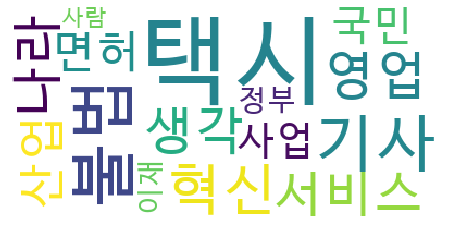

In [17]:
# 워드크라우드. 서버 상에서 한글 글꼴이 깨져 작업 폴더에 D2 coding 폰트 넣음
wordcloud = WordCloud(font_path = 'D2Coding.ttc',relative_scaling=0.5, background_color="white").generate_from_frequencies(result_freq_mc_dict)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
# 위 결과로 보았을 때 통과, 문제, 기사등이 많이 언급 되었음을 알 수 있다. 
# 택시와 고용 두 단어가 언급 된걸로 보아 택시 기사와 타다 운전자의 고용 문제 대립 관련 얘기가 있지 않을까 추측해본다.

In [19]:
import nltk #파이썬 자연어 처리에서 유명한 패키지라고 한다... 몰랐..
from nltk.probability import FreqDist # 빈도수 구하는 패키지

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


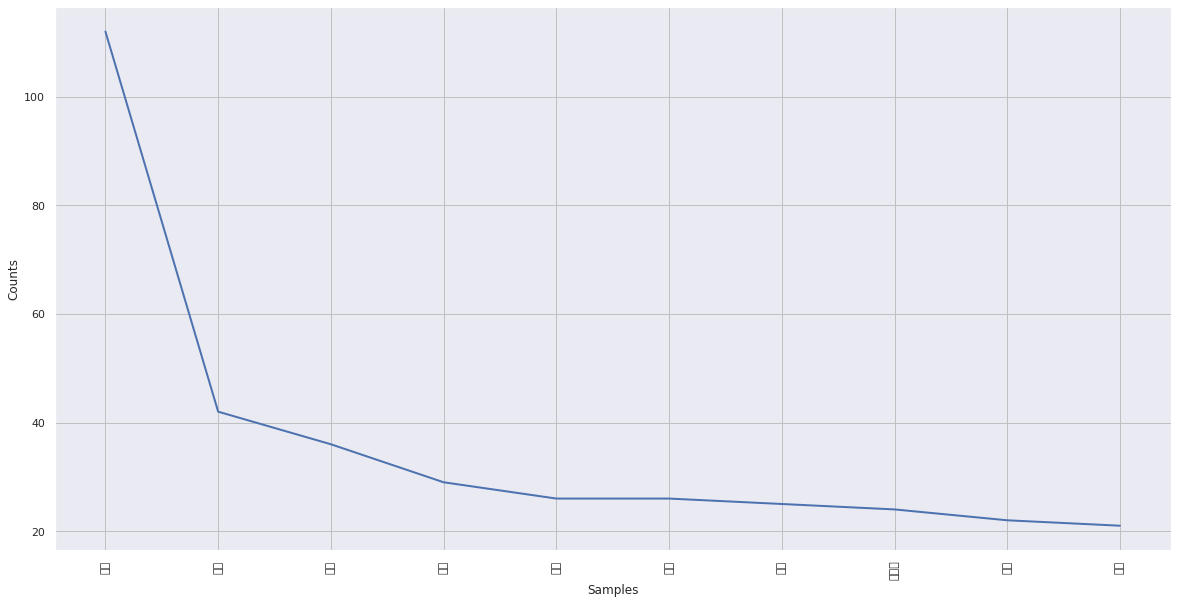

In [20]:
# font는 서버에 d2Coding 설치하면 될듯.... 조금 이따가...
# font는 ttf 라 하는데 자꾸 깨진다...
font_location = 'calibri.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
plt.figure(figsize=(20,10))


graph_comm = FreqDist(rm_dupl) # 두 단어 이상의 글자만 선택한 데이터에서 빈도수 구하고
graph_comm.plot(10) # 그려주기

#### 연관 그래프를 그려봅시다
- networkx 패키지를 사용합니다.
    - networkx는 네트워크 분석에 주로 사용되는 패키지입니다.
    - gephi같은 패키지도 있습니다.
    - 이 구역에서는 바라바시가 짱이에요.
    - 링크 책 꼭 읽어보세요 하하하
    - 네트워크는 노드와 엣지로 구성되고 그것을 기반으로 그립니다.
    
    
- apyori 패키지를 사용합니다.
    - 단어 간 연관성 분석을 위해 사용합니다.
    - apriori 알고리즘을 사용하여 단어간 연관성을 봅니다.
    - 이 결과를 바탕으로 네트워크를 그립니다.
    

In [55]:
from konlpy.tag import Hannanum
import re
import csv
from apyori import apriori
import networkx as nx

In [56]:
hannanum = Hannanum()

In [78]:
# 연관성 분석을 위해 댓글별로 단어 쪼개기
# 중복되는 사례가 보이는데 나중에 찾기

dataset = []
for i in range(len(comment_sort)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','',comment_sort[i])))
test_asso = dataset[:10]
test_asso

[['채이배', '이철희', '불법아니냐', '법좀제대', '국회의원해', '당신들', '이번', '마지막이지'],
 ['채이배', '이철희', '불법아니냐', '법좀제대', '국회의원해', '당신들', '이번', '마지막이지'],
 ['이의', '탕탕탕', '개그맨들', '분발', '개콘저리가라'],
 ['이의', '탕탕탕', '개그맨들', '분발', '개콘저리가라'],
 ['기업', '편', '손', '미통닭들', '금지', '이유', '신천지', '택시기사들', '표'],
 ['기업', '편', '손', '미통닭들', '금지', '이유', '신천지', '택시기사들', '표'],
 ['본질', '팍악하', '계시는거', '박수', '수'],
 ['본질', '팍악하', '계시는거', '박수', '수'],
 ['이철희', '너', '뭐냐미친'],
 ['뭘더', '토론할', '지금', '불법', '면허도', '사실상택시', '어디있냐', '랜터카', '영업', '것', '이법']]

In [76]:
# 자료 양이 너무 많아 로컬 PC에서 돌려야 할것 같아 csv파일로 뺌

csvfile = open('\crawling_project',"w",newline="")

csvwrite = csv.writer(csvfile)
for row in dataset:
    csvwrite.writerow(row)
    
csvfile.close()

In [81]:
# 연관성분석 명령어, 지지도가 0.01인 것만 가져오기

result = (list(apriori(test_asso, min_support = 0.01)))


In [115]:
#items가 2개인 것만 선택하기... support 값이 큰 차이가 없다...

df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] ==2) & df['support']>=0.1].sort_values(by='support',ascending=False)
df.head(10)

,items,support,ordered_statistics,length
40,"(개그맨들, 개콘저리가라)",0.2,"[((), (개그맨들, 개콘저리가라), 0.2, 1.0), ((개그맨들), (개콘저...",2
89,"(이철희, 당신들)",0.2,"[((), (이철희, 당신들), 0.2, 1.0), ((당신들), (이철희), 1....",2
135,"(팍악하, 본질)",0.2,"[((), (팍악하, 본질), 0.2, 1.0), ((본질), (팍악하), 1.0,...",2
134,"(본질, 수)",0.2,"[((), (본질, 수), 0.2, 1.0), ((본질), (수), 1.0, 5.0...",2
133,"(채이배, 법좀제대)",0.2,"[((), (채이배, 법좀제대), 0.2, 1.0), ((법좀제대), (채이배), ...",2
132,"(이철희, 법좀제대)",0.2,"[((), (이철희, 법좀제대), 0.2, 1.0), ((법좀제대), (이철희), ...",2
131,"(이번, 법좀제대)",0.2,"[((), (이번, 법좀제대), 0.2, 1.0), ((법좀제대), (이번), 1....",2
130,"(불법아니냐, 법좀제대)",0.2,"[((), (불법아니냐, 법좀제대), 0.2, 1.0), ((법좀제대), (불법아니...",2
129,"(박수, 팍악하)",0.2,"[((), (박수, 팍악하), 0.2, 1.0), ((박수), (팍악하), 1.0,...",2
128,"(박수, 수)",0.2,"[((), (박수, 수), 0.2, 1.0), ((박수), (수), 1.0, 5.0...",2


In [106]:
# 네트워크 그려주는 방법... 긁어와서 잘 모르겠음.... 뭐 그림만 나오면..
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

In [103]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [107]:
pos = nx.circular_layout(G)

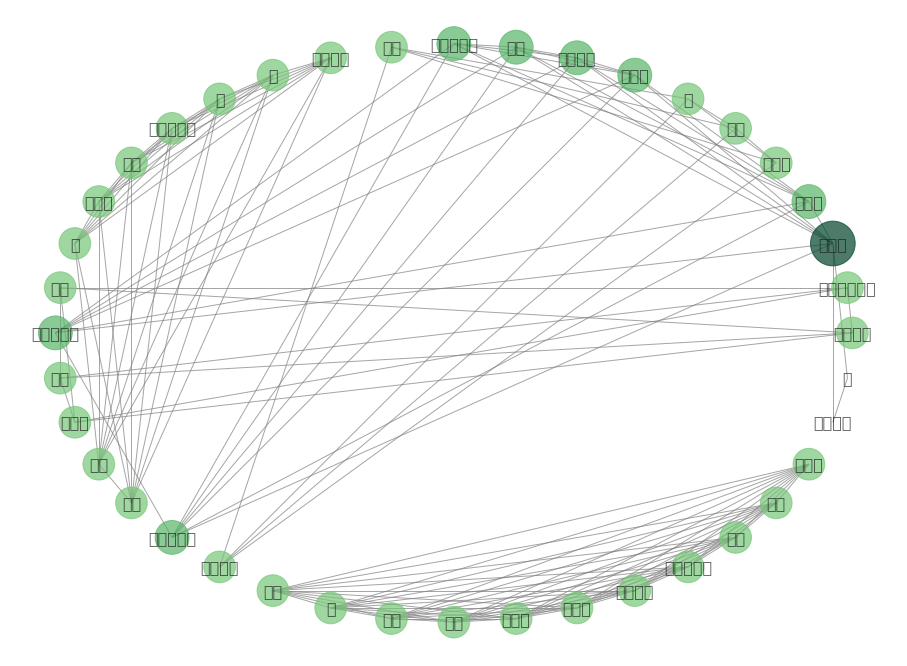

In [114]:
# 폰트 문제가 계속 발생... 아마 이전에 했던 설정 가져오면 괜찮을듯...
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha = 0.7, edge_color='.5', cmap=plt.cm.YlGn)